# K Means Clustering

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(['CustomerID', 'Genre', 'Age'], axis = 1 , inplace = True)

In [9]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


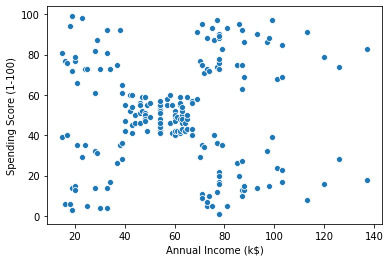

In [11]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = df)  #Clustering

In [14]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters = 5) #5 is no of clusters we are creating

In [19]:
km.fit_predict(df) #tells which row belongs which cluster

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [20]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
km.inertia_

44448.45544793371

In [23]:
km = KMeans(n_clusters = 200) #5 is no of clusters we are creating

In [24]:
km.fit(df)

C:\Users\anshita.shrivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
km.inertia_ #this shows that niether maz , nor minimum value for WCSS is good.



0.0

In [28]:
wcss = []
for i in range(1,41):
    km = KMeans(n_clusters = i)
    km.fit(df)
    wcss.append(km.inertia_)
    
    

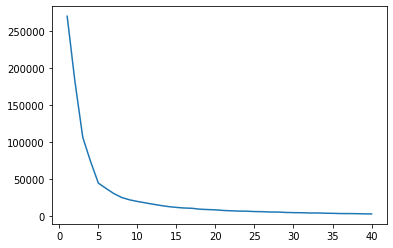

In [30]:
plt.plot(range(1,41), wcss)

In [31]:
#according to algo method , value of k is 5 . see above

In [32]:
km = KMeans(n_clusters = 5)
cluster_output = km.fit_predict(df)

In [33]:
df['cluster'] = cluster_output

In [34]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


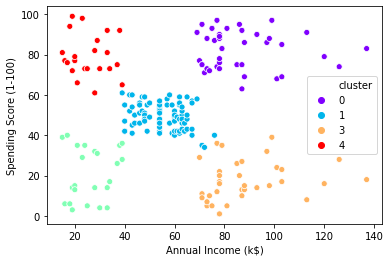

In [36]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = df, hue = 'cluster', palette = 'rainbow' )

In [37]:
km.cluster_centers_ # n dimensional array

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [38]:
array  = km.cluster_centers_

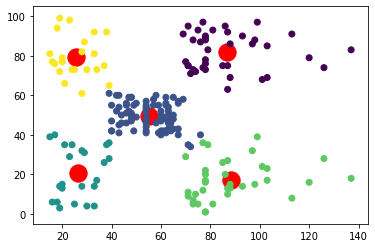

In [41]:
plt.scatter(array[:,0], array[:,1], s = 300, c = 'red')
plt.scatter(df.values[:,0], df.values[:,1], c = df['cluster'])